# Dados

Os dados foram coletados do primeiro round de jogos da competição RoboCup 2022. Cada arquivo .csv representa um jogo da equipe RobôCIn. No total, a equipe participou de 6 jogos no primeiro round.

O banco de dados com todos os jogos não é público, apenas as equipes participantes têm acesso no momento de criação deste projeto. 

Com o tempo, os dados de todos os jogos da RoboCup serão disponibilizados em: https://archive.robocup.info/. 
Este endereço também contém dados de outras equipes dos anos anteriores.


# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
import os

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
warnings.filterwarnings("ignore")

# Coleta de dados

In [2]:
games = []

path_to_data = './data_projeto_1/robocup/'
logfile_names = os.listdir(path_to_data)

for logfile in logfile_names:
    games.append(pd.read_csv(path_to_data + logfile))

In [3]:
# Escolher avaliar apenas um jogo
cgame = games[0] # current game

## Descrição

In [4]:
cgame

,show_time,playmode,team_name_l,team_name_r,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_side,player_l1_unum,player_l1_type,player_l1_state,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_quality,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_side,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,player_l1_counting_change_view,player_l1_counting_say,player_l1_counting_tackle,player_l1_counting_point_to,player_l1_counting_attention_to,player_l2_side,player_l2_unum,player_l2_type,player_l2_state,player_l2_x,player_l2_y,player_l2_vx,player_l2_vy,player_l2_body,player_l2_neck,player_l2_point_to_x,player_l2_point_to_y,player_l2_view_quality,player_l2_view_width,player_l2_attribute_stamina,player_l2_attribute_effort,player_l2_attribute_recovery,player_l2_attribute_stamina_capacity,player_l2_focus_side,player_l2_focus_unum,player_l2_counting_kick,player_l2_counting_dash,player_l2_counting_turn,player_l2_counting_catch,player_l2_counting_move,player_l2_counting_turn_neck,player_l2_counting_change_view,player_l2_counting_say,player_l2_counting_tackle,player_l2_counting_point_to,player_l2_counting_attention_to,player_l3_side,player_l3_unum,player_l3_type,player_l3_state,player_l3_x,player_l3_y,player_l3_vx,player_l3_vy,player_l3_body,player_l3_neck,player_l3_point_to_x,player_l3_point_to_y,player_l3_view_quality,player_l3_view_width,player_l3_attribute_stamina,player_l3_attribute_effort,player_l3_attribute_recovery,player_l3_attribute_stamina_capacity,player_l3_focus_side,player_l3_focus_unum,player_l3_counting_kick,player_l3_counting_dash,player_l3_counting_turn,player_l3_counting_catch,...,player_r8_counting_move,player_r8_counting_turn_neck,player_r8_counting_change_view,player_r8_counting_say,player_r8_counting_tackle,player_r8_counting_point_to,player_r8_counting_attention_to,player_r9_side,player_r9_unum,player_r9_type,player_r9_state,player_r9_x,player_r9_y,player_r9_vx,player_r9_vy,player_r9_body,player_r9_neck,player_r9_point_to_x,player_r9_point_to_y,player_r9_view_quality,player_r9_view_width,player_r9_attribute_stamina,player_r9_attribute_effort,player_r9_attribute_recovery,player_r9_attribute_stamina_capacity,player_r9_focus_side,player_r9_focus_unum,player_r9_counting_kick,player_r9_counting_dash,player_r9_counting_turn,player_r9_counting_catch,player_r9_counting_move,player_r9_counting_turn_neck,player_r9_counting_change_view,player_r9_counting_say,player_r9_counting_tackle,player_r9_counting_point_to,player_r9_counting_attention_to,player_r10_side,player_r10_unum,player_r10_type,player_r10_state,player_r10_x,player_r10_y,player_r10_vx,player_r10_vy,player_r10_body,player_r10_neck,player_r10_point_to_x,player_r10_point_to_y,player_r10_view_quality,player_r10_view_width,player_r10_attribute_stamina,player_r10_attribute_effort,player_r10_attribute_recovery,player_r10_attribute_stamina_capacity,player_r10_focus_side,player_r10_focus_unum,player_r10_counting_kick,player_r10_counting_dash,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_side,player_r11_unum,player_r11_type,player_r11_state,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_quality,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_effort,player_r11_attribute_recovery,player_r11_attribute_stamina_capacity,player_r11_focus_side,player_r11_

In [5]:
cgame.shape

(6658, 696)

In [6]:
cgame.describe()

,show_time,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_unum,player_l1_type,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,player_l1_counting_change_view,player_l1_counting_say,player_l1_counting_tackle,player_l1_counting_point_to,player_l1_counting_attention_to,player_l2_unum,player_l2_type,player_l2_x,player_l2_y,player_l2_vx,player_l2_vy,player_l2_body,player_l2_neck,player_l2_point_to_x,player_l2_point_to_y,player_l2_view_width,player_l2_attribute_stamina,player_l2_attribute_effort,player_l2_attribute_recovery,player_l2_attribute_stamina_capacity,player_l2_focus_unum,player_l2_counting_kick,player_l2_counting_dash,player_l2_counting_turn,player_l2_counting_catch,player_l2_counting_move,player_l2_counting_turn_neck,player_l2_counting_change_view,player_l2_counting_say,player_l2_counting_tackle,player_l2_counting_point_to,player_l2_counting_attention_to,player_l3_unum,player_l3_type,player_l3_x,player_l3_y,player_l3_vx,player_l3_vy,player_l3_body,player_l3_neck,player_l3_point_to_x,player_l3_point_to_y,player_l3_view_width,player_l3_attribute_stamina,player_l3_attribute_effort,player_l3_attribute_recovery,player_l3_attribute_stamina_capacity,player_l3_focus_unum,player_l3_counting_kick,player_l3_counting_dash,player_l3_counting_turn,player_l3_counting_catch,player_l3_counting_move,player_l3_counting_turn_neck,player_l3_counting_change_view,player_l3_counting_say,player_l3_counting_tackle,player_l3_counting_point_to,player_l3_counting_attention_to,player_l4_unum,player_l4_type,player_l4_x,player_l4_y,player_l4_vx,player_l4_vy,player_l4_body,player_l4_neck,...,player_r8_point_to_x,player_r8_point_to_y,player_r8_view_width,player_r8_attribute_stamina,player_r8_attribute_effort,player_r8_attribute_recovery,player_r8_attribute_stamina_capacity,player_r8_focus_unum,player_r8_counting_kick,player_r8_counting_dash,player_r8_counting_turn,player_r8_counting_catch,player_r8_counting_move,player_r8_counting_turn_neck,player_r8_counting_change_view,player_r8_counting_say,player_r8_counting_tackle,player_r8_counting_point_to,player_r8_counting_attention_to,player_r9_unum,player_r9_type,player_r9_x,player_r9_y,player_r9_vx,player_r9_vy,player_r9_body,player_r9_neck,player_r9_point_to_x,player_r9_point_to_y,player_r9_view_width,player_r9_attribute_stamina,player_r9_attribute_effort,player_r9_attribute_recovery,player_r9_attribute_stamina_capacity,player_r9_focus_unum,player_r9_counting_kick,player_r9_counting_dash,player_r9_counting_turn,player_r9_counting_catch,player_r9_counting_move,player_r9_counting_turn_neck,player_r9_counting_change_view,player_r9_counting_say,player_r9_counting_tackle,player_r9_counting_point_to,player_r9_counting_attention_to,player_r10_unum,player_r10_type,player_r10_x,player_r10_y,player_r10_vx,player_r10_vy,player_r10_body,player_r10_neck,player_r10_point_to_x,player_r10_point_to_y,player_r10_view_width,player_r10_attribute_stamina,player_r10_attribute_effort,player_r10_attribute_recovery,player_r10_attribute_stamina_capacity,player_r10_focus_unum,player_r10_counting_kick,player_r10_counting_dash,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_unum,player_r11_type,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_width,player_r11_attribute_s

In [7]:
cgame.columns.to_list()

['show_time',
 'playmode',
 'team_name_l',
 'team_name_r',
 'team_score_l',
 'team_score_r',
 'team_pen_score_l',
 'team_pen_score_r',
 'team_pen_miss_l',
 'team_pen_miss_r',
 'ball_x',
 'ball_y',
 'ball_vx',
 'ball_vy',
 'player_l1_side',
 'player_l1_unum',
 'player_l1_type',
 'player_l1_state',
 'player_l1_x',
 'player_l1_y',
 'player_l1_vx',
 'player_l1_vy',
 'player_l1_body',
 'player_l1_neck',
 'player_l1_point_to_x',
 'player_l1_point_to_y',
 'player_l1_view_quality',
 'player_l1_view_width',
 'player_l1_attribute_stamina',
 'player_l1_attribute_effort',
 'player_l1_attribute_recovery',
 'player_l1_attribute_stamina_capacity',
 'player_l1_focus_side',
 'player_l1_focus_unum',
 'player_l1_counting_kick',
 'player_l1_counting_dash',
 'player_l1_counting_turn',
 'player_l1_counting_catch',
 'player_l1_counting_move',
 'player_l1_counting_turn_neck',
 'player_l1_counting_change_view',
 'player_l1_counting_say',
 'player_l1_counting_tackle',
 'player_l1_counting_point_to',
 'player_l1

# Pré-processamento

## Definição de tipos

In [8]:
cgame.dtypes.value_counts()

float64    304
int64      301
object      91
dtype: int64

In [9]:
cgame.describe(include='object')

,playmode,team_name_l,team_name_r,player_l1_side,player_l1_state,player_l1_view_quality,player_l1_focus_side,player_l2_side,player_l2_state,player_l2_view_quality,player_l2_focus_side,player_l3_side,player_l3_state,player_l3_view_quality,player_l3_focus_side,player_l4_side,player_l4_state,player_l4_view_quality,player_l4_focus_side,player_l5_side,player_l5_state,player_l5_view_quality,player_l5_focus_side,player_l6_side,player_l6_state,player_l6_view_quality,player_l6_focus_side,player_l7_side,player_l7_state,player_l7_view_quality,player_l7_focus_side,player_l8_side,player_l8_state,player_l8_view_quality,player_l8_focus_side,player_l9_side,player_l9_state,player_l9_view_quality,player_l9_focus_side,player_l10_side,player_l10_state,player_l10_view_quality,player_l10_focus_side,player_l11_side,player_l11_state,player_l11_view_quality,player_l11_focus_side,player_r1_side,player_r1_state,player_r1_view_quality,player_r1_focus_side,player_r2_side,player_r2_state,player_r2_view_quality,player_r2_focus_side,player_r3_side,player_r3_state,player_r3_view_quality,player_r3_focus_side,player_r4_side,player_r4_state,player_r4_view_quality,player_r4_focus_side,player_r5_side,player_r5_state,player_r5_view_quality,player_r5_focus_side,player_r6_side,player_r6_state,player_r6_view_quality,player_r6_focus_side,player_r7_side,player_r7_state,player_r7_view_quality,player_r7_focus_side,player_r8_side,player_r8_state,player_r8_view_quality,player_r8_focus_side,player_r9_side,player_r9_state,player_r9_view_quality,player_r9_focus_side,player_r10_side,player_r10_state,player_r10_view_quality,player_r10_focus_side,player_r11_side,player_r11_state,player_r11_view_quality,player_r11_focus_side
count,6658,6658,6658,6658,6658,6658,6498,6658,6658,6658,6390,6658,6658,6658,6446,6658,6658,6658,6445,6658,6658,6658,6468,6658,6658,6658,6387,6658,6658,6658,6401,6658,6658,6658,6365,6658,6658,6658,6349,6658,6658,6658,6367,6658,6658,6658,6405,6658,6658,6658,6657,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6653,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6658,6656,6658,6658,6658,6658
unique,16,1,1,1,3,1,1,1,5,1,1,1,5,1,1,1,10,1,1,1,9,1,1,1,10,1,1,1,6,1,1,1,11,1,1,1,7,1,1,1,16,1,1,1,16,1,1,1,3,1,1,1,7,1,1,1,7,1,1,1,13,1,1,1,8,1,1,1,17,1,1,1,10,1,1,1,11,1,1,1,7,1,1,1,10,1,1,1,7,1,1
top,play_on,RoboCIn,Hfutengine2022,l,0x9,h,l,l,0x1,h,l,l,0x1,h,l,l,0x40001,h,l,l,0x1,h,l,l,0x1,h,l,l,0x1,h,l,l,0x1,h,l,l,0x1,h,l,l,0x1,h,l,l,0x40001,h,l,r,0x9,h,r,r,0x1,h,r,r,0x1,h,r,r,0x1,h,r,r,0x1,h,r,r,0x40001,h,r,r,0x1,h,r,r,0x1,h,r,r,0x1,h,r,r,0x1,h,r,r,0x1,h,r
freq,4348,6658,6658,6658,6656,6658,6498,6658,6589,6658,6390,6658,6596,6658,6446,6658,6155,6658,6445,6658,6575,6658,6468,6658,6490,6658,6387,6658,6537,6658,6401,6658,6437,6658,6365,6658,6535,6658,6349,6658,4346,6658,6367,6658,4445,6658,6405,6658,6655,6658,6657,6658,6585,6658,6658,6658,6623,6658,6658,6658,6544,6658,6658,6658,6598,6658,6658,6658,4322,6658,6658,6658,6398,6658,6653,6658,6319,6658,6658,6658,6440,6658,6658,6658,6402,6658,6656,6658,6462,6658,6658


In [10]:
cgame.describe(include='int64')

,show_time,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,player_l1_unum,player_l1_type,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,player_l1_counting_change_view,player_l1_counting_say,player_l1_counting_tackle,player_l1_counting_point_to,player_l1_counting_attention_to,player_l2_unum,player_l2_type,player_l2_counting_kick,player_l2_counting_dash,player_l2_counting_turn,player_l2_counting_catch,player_l2_counting_move,player_l2_counting_turn_neck,player_l2_counting_change_view,player_l2_counting_say,player_l2_counting_tackle,player_l2_counting_point_to,player_l2_counting_attention_to,player_l3_unum,player_l3_type,player_l3_counting_kick,player_l3_counting_dash,player_l3_counting_turn,player_l3_counting_catch,player_l3_counting_move,player_l3_counting_turn_neck,player_l3_counting_change_view,player_l3_counting_say,player_l3_counting_tackle,player_l3_counting_point_to,player_l3_counting_attention_to,player_l4_unum,player_l4_type,player_l4_counting_kick,player_l4_counting_dash,player_l4_counting_turn,player_l4_counting_catch,player_l4_counting_move,player_l4_counting_turn_neck,player_l4_counting_change_view,player_l4_counting_say,player_l4_counting_tackle,player_l4_counting_point_to,player_l4_counting_attention_to,player_l5_unum,player_l5_type,player_l5_counting_kick,player_l5_counting_dash,player_l5_counting_turn,player_l5_counting_catch,player_l5_counting_move,player_l5_counting_turn_neck,player_l5_counting_change_view,player_l5_counting_say,player_l5_counting_tackle,player_l5_counting_point_to,player_l5_counting_attention_to,player_l6_unum,player_l6_type,player_l6_counting_kick,player_l6_counting_dash,player_l6_counting_turn,player_l6_counting_catch,player_l6_counting_move,player_l6_counting_turn_neck,player_l6_counting_change_view,player_l6_counting_say,player_l6_counting_tackle,player_l6_counting_point_to,player_l6_counting_attention_to,player_l7_unum,player_l7_type,player_l7_counting_kick,player_l7_counting_dash,player_l7_counting_turn,player_l7_counting_catch,player_l7_counting_move,player_l7_counting_turn_neck,player_l7_counting_change_view,player_l7_counting_say,player_l7_counting_tackle,player_l7_counting_point_to,player_l7_counting_attention_to,player_l8_unum,player_l8_type,...,player_r4_counting_say,player_r4_counting_tackle,player_r4_counting_point_to,player_r4_counting_attention_to,player_r5_unum,player_r5_type,player_r5_focus_unum,player_r5_counting_kick,player_r5_counting_dash,player_r5_counting_turn,player_r5_counting_catch,player_r5_counting_move,player_r5_counting_turn_neck,player_r5_counting_change_view,player_r5_counting_say,player_r5_counting_tackle,player_r5_counting_point_to,player_r5_counting_attention_to,player_r6_unum,player_r6_type,player_r6_focus_unum,player_r6_counting_kick,player_r6_counting_dash,player_r6_counting_turn,player_r6_counting_catch,player_r6_counting_move,player_r6_counting_turn_neck,player_r6_counting_change_view,player_r6_counting_say,player_r6_counting_tackle,player_r6_counting_point_to,player_r6_counting_attention_to,player_r7_unum,player_r7_type,player_r7_counting_kick,player_r7_counting_dash,player_r7_counting_turn,player_r7_counting_catch,player_r7_counting_move,player_r7_counting_turn_neck,player_r7_counting_change_view,player_r7_counting_say,player_r7_counting_tackle,player_r7_counting_point_to,player_r7_counting_attention_to,player_r8_unum,player_r8_type,player_r8_focus_unum,player_r8_counting_kick,player_r8_counting_dash,player_r8_counting_turn,player_r8_counting_catch,player_r8_counting_move,player_r8_counting_turn_neck,player_r8_counting_change_view,player_r8_counting_say,player_r8_counting_tackle,player_r8_counting_point_to,player_r8_counting_attention_to,player_r9_unum,player_r9_type,player_r9_focus_unum,player_r9_counting_kick,player_r9_counting_dash,player_r9_counting_turn,player_r9_counting_catch,player_r9_counting_move

In [11]:
cgame.describe(include='float64')

,ball_x,ball_y,ball_vx,ball_vy,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_unum,player_l2_x,player_l2_y,player_l2_vx,player_l2_vy,player_l2_body,player_l2_neck,player_l2_point_to_x,player_l2_point_to_y,player_l2_view_width,player_l2_attribute_stamina,player_l2_attribute_effort,player_l2_attribute_recovery,player_l2_attribute_stamina_capacity,player_l2_focus_unum,player_l3_x,player_l3_y,player_l3_vx,player_l3_vy,player_l3_body,player_l3_neck,player_l3_point_to_x,player_l3_point_to_y,player_l3_view_width,player_l3_attribute_stamina,player_l3_attribute_effort,player_l3_attribute_recovery,player_l3_attribute_stamina_capacity,player_l3_focus_unum,player_l4_x,player_l4_y,player_l4_vx,player_l4_vy,player_l4_body,player_l4_neck,player_l4_point_to_x,player_l4_point_to_y,player_l4_view_width,player_l4_attribute_stamina,player_l4_attribute_effort,player_l4_attribute_recovery,player_l4_attribute_stamina_capacity,player_l4_focus_unum,player_l5_x,player_l5_y,player_l5_vx,player_l5_vy,player_l5_body,player_l5_neck,player_l5_point_to_x,player_l5_point_to_y,player_l5_view_width,player_l5_attribute_stamina,player_l5_attribute_effort,player_l5_attribute_recovery,player_l5_attribute_stamina_capacity,player_l5_focus_unum,player_l6_x,player_l6_y,player_l6_vx,player_l6_vy,player_l6_body,player_l6_neck,player_l6_point_to_x,player_l6_point_to_y,player_l6_view_width,player_l6_attribute_stamina,player_l6_attribute_effort,player_l6_attribute_recovery,player_l6_attribute_stamina_capacity,player_l6_focus_unum,player_l7_x,player_l7_y,player_l7_vx,player_l7_vy,player_l7_body,player_l7_neck,player_l7_point_to_x,player_l7_point_to_y,player_l7_view_width,player_l7_attribute_stamina,player_l7_attribute_effort,player_l7_attribute_recovery,...,player_r4_point_to_x,player_r4_point_to_y,player_r4_view_width,player_r4_attribute_stamina,player_r4_attribute_effort,player_r4_attribute_recovery,player_r4_attribute_stamina_capacity,player_r5_x,player_r5_y,player_r5_vx,player_r5_vy,player_r5_body,player_r5_neck,player_r5_point_to_x,player_r5_point_to_y,player_r5_view_width,player_r5_attribute_stamina,player_r5_attribute_effort,player_r5_attribute_recovery,player_r5_attribute_stamina_capacity,player_r6_x,player_r6_y,player_r6_vx,player_r6_vy,player_r6_body,player_r6_neck,player_r6_point_to_x,player_r6_point_to_y,player_r6_view_width,player_r6_attribute_stamina,player_r6_attribute_effort,player_r6_attribute_recovery,player_r6_attribute_stamina_capacity,player_r7_x,player_r7_y,player_r7_vx,player_r7_vy,player_r7_body,player_r7_neck,player_r7_point_to_x,player_r7_point_to_y,player_r7_view_width,player_r7_attribute_stamina,player_r7_attribute_effort,player_r7_attribute_recovery,player_r7_attribute_stamina_capacity,player_r7_focus_unum,player_r8_x,player_r8_y,player_r8_vx,player_r8_vy,player_r8_body,player_r8_neck,player_r8_point_to_x,player_r8_point_to_y,player_r8_view_width,player_r8_attribute_stamina,player_r8_attribute_effort,player_r8_attribute_recovery,player_r8_attribute_stamina_capacity,player_r9_x,player_r9_y,player_r9_vx,player_r9_vy,player_r9_body,player_r9_neck,player_r9_point_to_x,player_r9_point_to_y,player_r9_view_width,player_r9_attribute_stamina,player_r9_attribute_effort,player_r9_attribute_recovery,player_r9_attribute_stamina_capacity,player_r10_x,player_r10_y,player_r10_vx,player_r10_vy,player_r10_body,player_r10_neck,player_r10_point_to_x,player_r10_point_to_y,player_r10_view_width,player_r10_attribute_stamina,player_r10_attribute_effort,player_r10_attribute_recovery,player_r10_attribute_stamina_capacity,player_r10_focus_unum,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_ef

In [12]:
cgame.dtypes

show_time                            int64
playmode                            object
team_name_l                         object
team_name_r                         object
team_score_l                         int64
                                     ...  
player_r11_counting_change_view      int64
player_r11_counting_say              int64
player_r11_counting_tackle           int64
player_r11_counting_point_to         int64
player_r11_counting_attention_to     int64
Length: 696, dtype: object

## Tratamento de dados ausentes

In [13]:
cgame.isnull()

,show_time,playmode,team_name_l,team_name_r,team_score_l,team_score_r,team_pen_score_l,team_pen_score_r,team_pen_miss_l,team_pen_miss_r,ball_x,ball_y,ball_vx,ball_vy,player_l1_side,player_l1_unum,player_l1_type,player_l1_state,player_l1_x,player_l1_y,player_l1_vx,player_l1_vy,player_l1_body,player_l1_neck,player_l1_point_to_x,player_l1_point_to_y,player_l1_view_quality,player_l1_view_width,player_l1_attribute_stamina,player_l1_attribute_effort,player_l1_attribute_recovery,player_l1_attribute_stamina_capacity,player_l1_focus_side,player_l1_focus_unum,player_l1_counting_kick,player_l1_counting_dash,player_l1_counting_turn,player_l1_counting_catch,player_l1_counting_move,player_l1_counting_turn_neck,player_l1_counting_change_view,player_l1_counting_say,player_l1_counting_tackle,player_l1_counting_point_to,player_l1_counting_attention_to,player_l2_side,player_l2_unum,player_l2_type,player_l2_state,player_l2_x,player_l2_y,player_l2_vx,player_l2_vy,player_l2_body,player_l2_neck,player_l2_point_to_x,player_l2_point_to_y,player_l2_view_quality,player_l2_view_width,player_l2_attribute_stamina,player_l2_attribute_effort,player_l2_attribute_recovery,player_l2_attribute_stamina_capacity,player_l2_focus_side,player_l2_focus_unum,player_l2_counting_kick,player_l2_counting_dash,player_l2_counting_turn,player_l2_counting_catch,player_l2_counting_move,player_l2_counting_turn_neck,player_l2_counting_change_view,player_l2_counting_say,player_l2_counting_tackle,player_l2_counting_point_to,player_l2_counting_attention_to,player_l3_side,player_l3_unum,player_l3_type,player_l3_state,player_l3_x,player_l3_y,player_l3_vx,player_l3_vy,player_l3_body,player_l3_neck,player_l3_point_to_x,player_l3_point_to_y,player_l3_view_quality,player_l3_view_width,player_l3_attribute_stamina,player_l3_attribute_effort,player_l3_attribute_recovery,player_l3_attribute_stamina_capacity,player_l3_focus_side,player_l3_focus_unum,player_l3_counting_kick,player_l3_counting_dash,player_l3_counting_turn,player_l3_counting_catch,...,player_r8_counting_move,player_r8_counting_turn_neck,player_r8_counting_change_view,player_r8_counting_say,player_r8_counting_tackle,player_r8_counting_point_to,player_r8_counting_attention_to,player_r9_side,player_r9_unum,player_r9_type,player_r9_state,player_r9_x,player_r9_y,player_r9_vx,player_r9_vy,player_r9_body,player_r9_neck,player_r9_point_to_x,player_r9_point_to_y,player_r9_view_quality,player_r9_view_width,player_r9_attribute_stamina,player_r9_attribute_effort,player_r9_attribute_recovery,player_r9_attribute_stamina_capacity,player_r9_focus_side,player_r9_focus_unum,player_r9_counting_kick,player_r9_counting_dash,player_r9_counting_turn,player_r9_counting_catch,player_r9_counting_move,player_r9_counting_turn_neck,player_r9_counting_change_view,player_r9_counting_say,player_r9_counting_tackle,player_r9_counting_point_to,player_r9_counting_attention_to,player_r10_side,player_r10_unum,player_r10_type,player_r10_state,player_r10_x,player_r10_y,player_r10_vx,player_r10_vy,player_r10_body,player_r10_neck,player_r10_point_to_x,player_r10_point_to_y,player_r10_view_quality,player_r10_view_width,player_r10_attribute_stamina,player_r10_attribute_effort,player_r10_attribute_recovery,player_r10_attribute_stamina_capacity,player_r10_focus_side,player_r10_focus_unum,player_r10_counting_kick,player_r10_counting_dash,player_r10_counting_turn,player_r10_counting_catch,player_r10_counting_move,player_r10_counting_turn_neck,player_r10_counting_change_view,player_r10_counting_say,player_r10_counting_tackle,player_r10_counting_point_to,player_r10_counting_attention_to,player_r11_side,player_r11_unum,player_r11_type,player_r11_state,player_r11_x,player_r11_y,player_r11_vx,player_r11_vy,player_r11_body,player_r11_neck,player_r11_point_to_x,player_r11_point_to_y,player_r11_view_quality,player_r11_view_width,player_r11_attribute_stamina,player_r11_attribute_effort,player_r11_attribute_recovery,player_r11_attribute_stamina_capacity,player_r11_focus_side,player_r11_

In [15]:
# qual o percentil de valores nulos dentro da coluna?

(cgame.count() / cgame.shape[0] * 100).sort_values()

player_r7_point_to_x                  0.0
player_l6_point_to_y                  0.0
player_l6_point_to_x                  0.0
player_l11_point_to_y                 0.0
player_l11_point_to_x                 0.0
                                    ...  
player_l8_counting_kick             100.0
player_l8_counting_dash             100.0
player_l8_counting_turn             100.0
player_l8_side                      100.0
player_r11_counting_attention_to    100.0
Length: 696, dtype: float64

### Removendo colunas com  +10% de valores faltantes

In [16]:
cgame = cgame.dropna(thresh=0.1*cgame.shape[0], axis=1)

In [17]:
(cgame.count() / cgame.shape[0] * 100).sort_values()

player_l9_focus_side                 95.358967
player_l9_focus_unum                 95.358967
player_l8_focus_unum                 95.599279
player_l8_focus_side                 95.599279
player_l10_focus_side                95.629318
                                       ...    
player_l8_body                      100.000000
player_l8_neck                      100.000000
player_l8_view_quality              100.000000
player_l8_state                     100.000000
player_r11_counting_attention_to    100.000000
Length: 652, dtype: float64

In [18]:
cgame.shape

(6658, 652)

In [19]:
cgame['playmode'].value_counts()

play_on          4348
kick_in_l         590
kick_in_r         557
foul_charge_l     300
foul_charge_r     180
corner_kick_r     167
goal_r            153
corner_kick_l     124
free_kick_r        55
free_kick_l        51
goal_kick_r        44
goal_kick_l        34
offside_r          30
kick_off_l         13
kick_off_r         11
time_over           1
Name: playmode, dtype: int64

### Imputação de dados de velocidade resultante

In [34]:
velocidade_jogadores = cgame[['player_l1_vx','player_l1_vy','player_l2_vx','player_l2_vy',
     'player_l3_vx','player_l3_vy','player_l4_vx','player_l4_vy','player_l5_vx','player_l5_vy',
     'player_l6_vx','player_l6_vy','player_l7_vx','player_l7_vy','player_l8_vx','player_l8_vy',
     'player_l9_vx','player_l9_vy','player_l10_vx','player_l10_vy','player_l11_vx','player_l11_vy',
     'player_r1_vx','player_r1_vy','player_r2_vx','player_r2_vy','player_r3_vx','player_r3_vy',
     'player_r4_vx','player_r4_vy','player_r5_vx', 'player_r5_vy','player_r6_vx','player_r6_vy',
     'player_r7_vx','player_r7_vy','player_r8_vx','player_r8_vy','player_r9_vx','player_r9_vy',
     'player_r10_vx','player_r10_vy','player_r11_vx','player_r11_vy']
]

In [35]:
velocidade_jogadores

,player_l1_vx,player_l1_vy,player_l2_vx,player_l2_vy,player_l3_vx,player_l3_vy,player_l4_vx,player_l4_vy,player_l5_vx,player_l5_vy,player_l6_vx,player_l6_vy,player_l7_vx,player_l7_vy,player_l8_vx,player_l8_vy,player_l9_vx,player_l9_vy,player_l10_vx,player_l10_vy,player_l11_vx,player_l11_vy,player_r1_vx,player_r1_vy,player_r2_vx,player_r2_vy,player_r3_vx,player_r3_vy,player_r4_vx,player_r4_vy,player_r5_vx,player_r5_vy,player_r6_vx,player_r6_vy,player_r7_vx,player_r7_vy,player_r8_vx,player_r8_vy,player_r9_vx,player_r9_vy,player_r10_vx,player_r10_vy,player_r11_vx,player_r11_vy
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0499,-0.0038,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0867,0.0926,0.0000,0.0000,0.0432,0.0732,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.1972,-0.0954,-0.2119,-0.0234,0.0000,0.0000,0.0000,0.0000,0.1085,-0.1952,0.1527,0.1038,0.1268,0.0876,0.0000,0.0000,-0.0571,0.2173,0.0000,0.0000,0.0000,0.0000,0.0713,-0.0047,-0.1551,-0.0157,-0.1133,0.0702,-0.1680,0.0098,-0.1097,0.1328,-0.1170,0.0413,0.0680,0.0670,0.1670,-0.1719,0.0532,-0.2302,0.1466,0.1663,0.0000,0.0000
2,0.0821,-0.0377,-0.3110,-0.0315,-0.1961,-0.0523,0.2191,0.0448,0.0588,-0.0907,0.0558,0.0366,0.0361,0.0281,0.1999,-0.0751,-0.0744,0.3188,0.0000,0.0000,0.0000,0.0000,0.0284,-0.0009,-0.2125,-0.0206,-0.1691,0.1092,-0.2372,0.0217,-0.0355,0.0446,-0.1617,0.0686,0.0293,0.0319,0.0712,-0.0836,0.0704,-0.3226,0.2217,0.2426,-0.0047,-0.1374
3,0.2745,-0.0046,-0.2508,-0.0111,-0.2413,-0.0789,0.3308,0.0838,0.1313,-0.2205,0.1974,0.0596,0.1033,0.1393,0.2591,-0.1209,-0.0691,0.3550,0.0000,0.0000,0.0000,0.0000,0.0110,-0.0006,-0.2588,-0.0209,-0.1926,0.1122,-0.2722,0.0351,-0.1438,0.0454,-0.0493,0.0223,0.0142,0.0148,0.0334,-0.0409,0.0814,-0.3725,0.2352,0.2585,-0.0020,-0.0572
4,0.3579,0.0257,-0.1103,-0.0027,-0.2793,-0.0872,0.1583,0.0332,0.0600,-0.1018,0.0730,0.0183,0.0314,0.0457,0.3197,-0.1162,-0.0282,0.1635,0.0000,0.0000,0.0000,0.0000,0.0041,-0.0001,-0.1281,-0.0055,-0.1891,0.1145,-0.1391,0.0198,-0.1783,0.0574,0.0599,-0.0363,0.0064,0.0066,0.0149,-0.0175,0.0739,-0.3511,0.2417,0.2341,-0.0001,-0.0251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6653,0.0010,-0.0462,0.0036,0.0031,-0.0111,0.0621,-0.1944,0.1994,-0.0068,0.0141,-0.0734,0.0068,-0.0003,-0.0009,-0.0143,0.0042,-0.0100,0.0143,0.1220,0.0089,0.0124,-0.0147,-0.0657,0.0102,0.2274,0.0293,0.2161,0.1396,-0.0680,0.3410,0.0016,0.0033,0.1891,0.0916,0.0117,0.0191,-0.0087,0.1643,-0.0737,0.2527,-0.1777,-0.0086,0.0795,-0.1803
6654,0.0006,-0.0172,-0.2236,0.0478,-0.0047,0.0192,-0.0950,0.0879,-0.0033,0.0066,-0.0318,0.0039,0.0589,0.2229,-0.0047,0.0016,-0.0847,0.0799,0.0530,0.0006,0.0053,-0.0063,-0.0251,0.0017,0.1153,0.0142,0.0850,0.0604,-0.1074,0.3749,0.0006,0.0011,0.0552,0.0326,0.0038,0.0061,-0.0304,0.2563,-0.0892,0.2572,-0.1318,-0.0303,0.0353,-0.0808
6655,0.0001,-0.0070,-0.0996,0.0299,0.0360,0.2069,-0.0423,0.2175,-0.0015,0.0031,0.1517,-0.1489,0.0736,0.2881,-0.2430,-0.0057,-0.0393,0.0347,0.0223,-0.0006,0.0021,-0.0025,-0.0099,0.0012,0.1939,0.1915,-0.0439,0.1609,-0.1144,0.3992,-0.1070,0.2003,0.0160,0.0106,-0.1237,0.0423,-0.0350,0.2916,-0.1033,0.2774,-0.1220,-0.0447,0.0169,-0.0380
6656,-0.0054,0.1959,-0.1329,0.2137,0.0315,0.2679,-0.0317,0.3354,-0.0008,0.0013,0.2849,-0.2257,0.0837,0.3233,-0.0885,-0.0056,-0.0704,0.1171,0.1325,0.0001,-0.0850,0.0560,-0.0040,0.0002,0.2325,0.2855,-0.0904,0.2040,-0.0502,0.1720,-0.1606,0.2523,0.0558,0.1445,-0.0384,0.0137,-0.0478,0.2990,-0.1008,0.2614,-0.1220,-0.0353,-0.1064,0.1500


In [39]:
velocidade_jogadores_resultante = pd.DataFrame()

for ith in range(1, 12):
    velocidade_jogadores_resultante[f'player_l{ith}_v'] = velocidade_jogadores[f'player_l{ith}_vx'] + velocidade_jogadores[f'player_l{ith}_vy']

In [40]:
velocidade_jogadores_resultante

,player_l1_v,player_l2_v,player_l3_v,player_l4_v,player_l5_v,player_l6_v,player_l7_v,player_l8_v,player_l9_v,player_l10_v,player_l11_v
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.1018,-0.2353,0.0000,0.0000,-0.0867,0.2565,0.2144,0.0000,0.1602,0.0000,0.0000
2,0.0444,-0.3425,-0.2484,0.2639,-0.0319,0.0924,0.0642,0.1248,0.2444,0.0000,0.0000
3,0.2699,-0.2619,-0.3202,0.4146,-0.0892,0.2570,0.2426,0.1382,0.2859,0.0000,0.0000
4,0.3836,-0.1130,-0.3665,0.1915,-0.0418,0.0913,0.0771,0.2035,0.1353,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
6653,-0.0452,0.0067,0.0510,0.0050,0.0073,-0.0666,-0.0012,-0.0101,0.0043,0.1309,-0.0023
6654,-0.0166,-0.1758,0.0145,-0.0071,0.0033,-0.0279,0.2818,-0.0031,-0.0048,0.0536,-0.0010
6655,-0.0069,-0.0697,0.2429,0.1752,0.0016,0.0028,0.3617,-0.2487,-0.0046,0.0217,-0.0004
6656,0.1905,0.0808,0.2994,0.3037,0.0005,0.0592,0.4070,-0.0941,0.0467,0.1326,-0.0290


## Normalização e discretização

Técnica não faz muito sentido no contexto

# Exploração de dados

<AxesSubplot:>

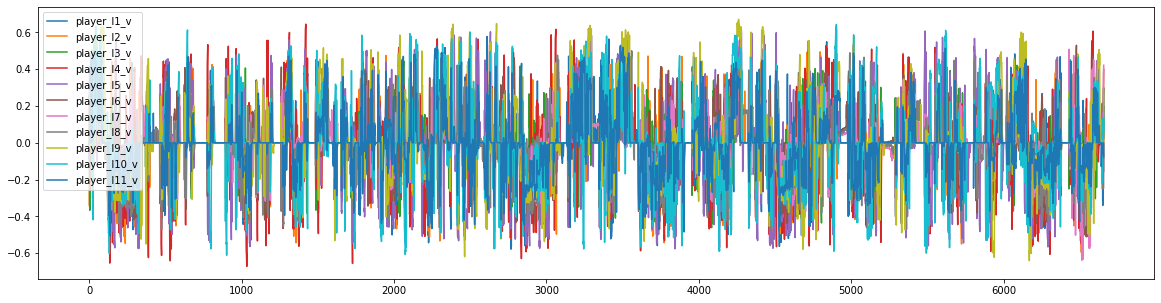

In [43]:
velocidade_jogadores_resultante.plot(figsize=(20,5))

<AxesSubplot:xlabel='playmode'>

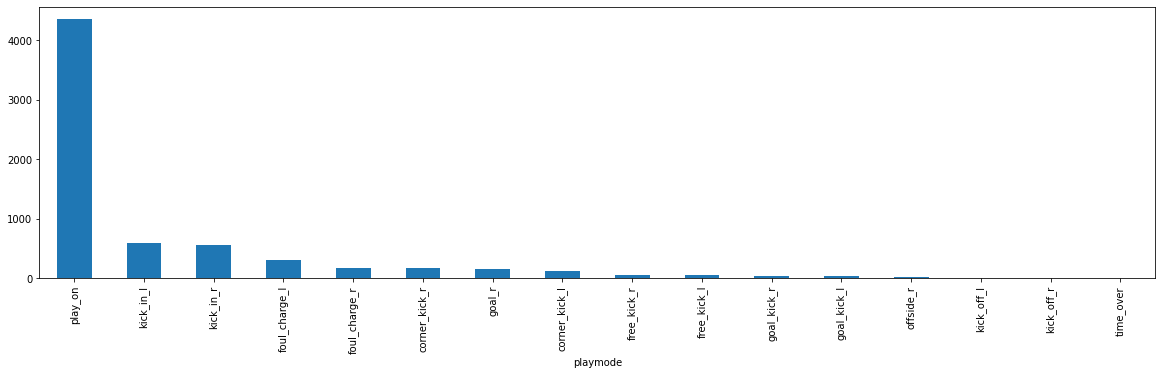

In [20]:
# Modos de jogo mais frequentes

cgame.value_counts(cgame['playmode']).plot.bar(figsize=(20,5))

In [21]:
# Colunas das posições dos jogadores

posicoes_jogadores = cgame[
    ['ball_x', 'ball_y','player_l1_x','player_l1_y','player_l2_x','player_l2_y',
     'player_l3_x','player_l3_y','player_l4_x','player_l4_y','player_l5_x','player_l5_y',
     'player_l6_x','player_l6_y','player_l7_x','player_l7_y','player_l8_x','player_l8_y',
     'player_l9_x','player_l9_y','player_l10_x','player_l10_y','player_l11_x','player_l11_y',
     'player_r1_x','player_r1_y','player_r2_x','player_r2_y','player_r3_x','player_r3_y',
     'player_r4_x','player_r4_y','player_r5_x', 'player_r5_y','player_r6_x','player_r6_y',
     'player_r7_x','player_r7_y','player_r8_x','player_r8_y','player_r9_x','player_r9_y',
     'player_r10_x','player_r10_y','player_r11_x','player_r11_y']
]
posicoes_jogadores.head()

,ball_x,ball_y,player_l1_x,player_l1_y,player_l2_x,player_l2_y,player_l3_x,player_l3_y,player_l4_x,player_l4_y,player_l5_x,player_l5_y,player_l6_x,player_l6_y,player_l7_x,player_l7_y,player_l8_x,player_l8_y,player_l9_x,player_l9_y,player_l10_x,player_l10_y,player_l11_x,player_l11_y,player_r1_x,player_r1_y,player_r2_x,player_r2_y,player_r3_x,player_r3_y,player_r4_x,player_r4_y,player_r5_x,player_r5_y,player_r6_x,player_r6_y,player_r7_x,player_r7_y,player_r8_x,player_r8_y,player_r9_x,player_r9_y,player_r10_x,player_r10_y,player_r11_x,player_r11_y
0,0.000,0.0000,-49.0000,0.0000,-12.5000,-5.0000,-12.5000,5.0000,-11.6000,-15.8000,-11.6000,15.8000,-6.7000,-1.9000,-10.0000,-10.8000,-10.0000,10.8000,-0.5000,-23.8000,-0.5,23.8,-0.385,0.0,49.1248,-0.0094,23.0000,8.0000,23.0000,-8.0000,18.0000,17.5000,17.7411,-17.2235,13.5000,0.0000,6.3757,7.4887,6.2801,-7.3268,0.0010,16.0000,0.0010,-16.0000,9.6500,0.0000
1,0.000,0.0000,-48.5071,-0.2384,-12.9684,-5.0517,-12.5000,5.0000,-11.6000,-15.8000,-11.3660,15.3789,-6.2828,-1.6163,-9.5864,-10.5142,-10.0000,10.8000,-0.6191,-23.3467,-0.5,23.8,-0.385,0.0,49.3031,-0.0210,22.6764,7.9672,22.6972,-7.8123,17.6479,17.5205,17.4134,-16.8267,13.1253,0.1324,6.5259,7.6368,6.6426,-7.7000,0.1165,15.5004,0.3277,-15.6293,9.6500,0.0000
2,0.000,0.0000,-48.3018,-0.3328,-13.6559,-5.1214,-13.1278,4.8326,-11.1245,-15.7027,-11.2392,15.1832,-6.1304,-1.5162,-9.4688,-10.4225,-9.4027,10.5756,-0.7743,-22.6816,-0.5,23.8,-0.385,0.0,49.3740,-0.0233,22.2331,7.9242,22.2450,-7.5204,17.1508,17.5659,17.3075,-16.6936,12.6077,0.3519,6.5906,7.7072,6.7970,-7.8815,0.2694,14.8000,0.8219,-15.0887,9.6389,-0.3270
3,0.000,0.0000,-47.6156,-0.3444,-14.2104,-5.1458,-13.9001,4.5800,-10.4064,-15.5208,-10.9560,14.7076,-5.5909,-1.3533,-9.1317,-9.9679,-8.6285,10.2144,-0.9185,-21.9409,-0.5,23.8,-0.385,0.0,49.4015,-0.0248,21.6931,7.8806,21.7301,-7.2202,16.5804,17.6394,16.8777,-16.5581,12.4499,0.4232,6.6219,7.7399,6.8695,-7.9703,0.4462,13.9914,1.3460,-14.5126,9.6342,-0.4632
4,-2.015,-0.3938,-46.7209,-0.2801,-14.4542,-5.1518,-14.7941,4.3010,-10.0628,-15.4487,-10.8267,14.4880,-5.3913,-1.3034,-9.0292,-9.8187,-7.6734,9.8673,-0.9773,-21.5997,-0.5,23.8,-0.385,0.0,49.4117,-0.0251,21.4258,7.8692,21.2245,-6.9140,16.2890,17.6808,16.3449,-16.3865,12.6416,0.3069,6.6360,7.7546,6.9018,-8.0083,0.6065,13.2292,1.8847,-13.9908,9.6341,-0.5228


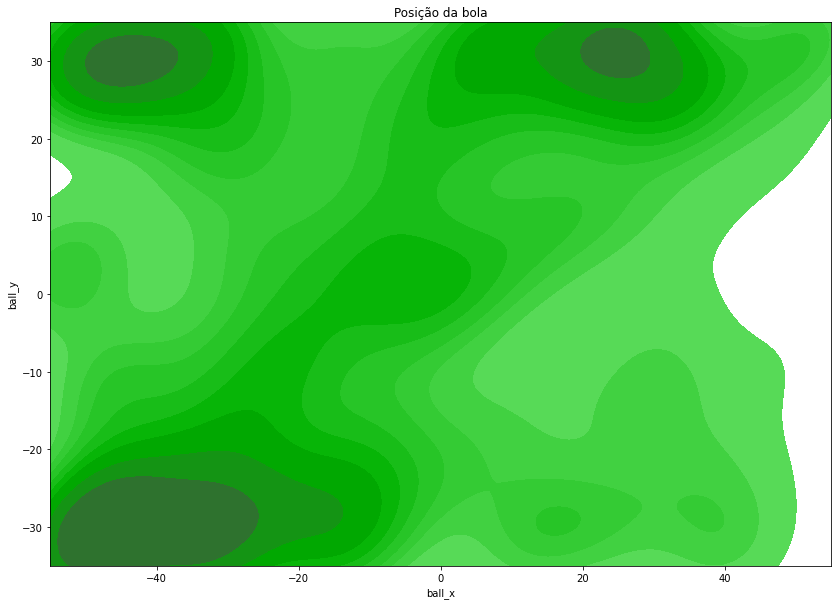

In [22]:
# Mapa de calor da posição da bola no campo
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

sns.kdeplot(posicoes_jogadores['ball_x'], posicoes_jogadores['ball_y'], shade = "True", color = "green", n_levels =10)
plt.title('Posição da bola')
plt.ylim(-35,35)
plt.xlim(-55,55)
plt.show()

## Ações básicas dos agentes

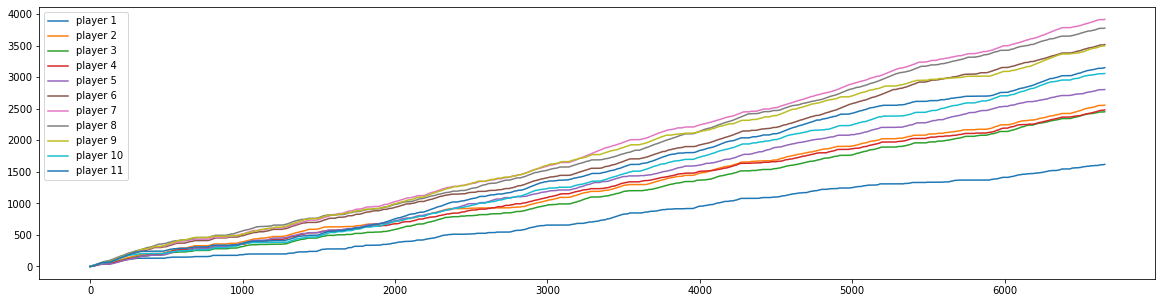

In [23]:
# Se deslocar
side = 'l'
action = 'dash'

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
    
for player_number in range(1, 12):
    plt.plot(cgame[f'player_{side}{player_number}_counting_{action}'], label = f'player {player_number}')
    plt.legend(loc="upper left")
    

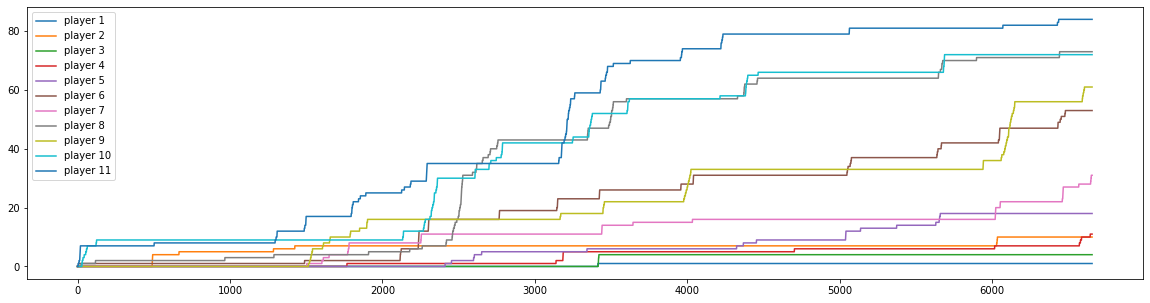

In [24]:
# Chutar a bola
side = 'l'
action = 'kick'

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
    
for player_number in range(1, 12):
    plt.plot(cgame[f'player_{side}{player_number}_counting_{action}'], label = f'player {player_number}')
    plt.legend(loc="upper left")
    

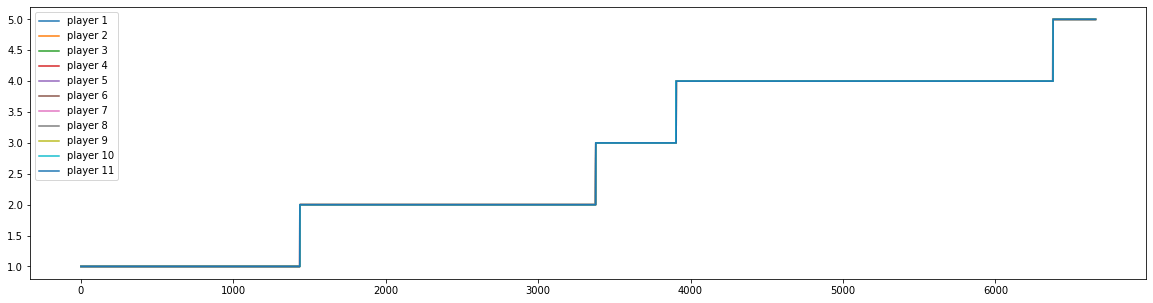

In [25]:
# Move
side = 'l'
action = 'move'

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
    
for player_number in range(1, 12):
    plt.plot(cgame[f'player_{side}{player_number}_counting_{action}'], label = f'player {player_number}')
    plt.legend(loc="upper left")
    

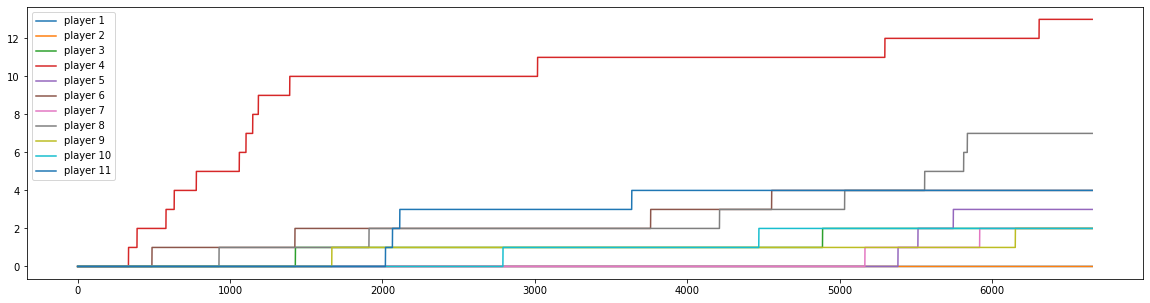

In [26]:
# Move
side = 'l'
action = 'tackle'

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
    
for player_number in range(1, 12):
    plt.plot(cgame[f'player_{side}{player_number}_counting_{action}'], label = f'player {player_number}')
    plt.legend(loc="upper left")

# Outliers de velocidade

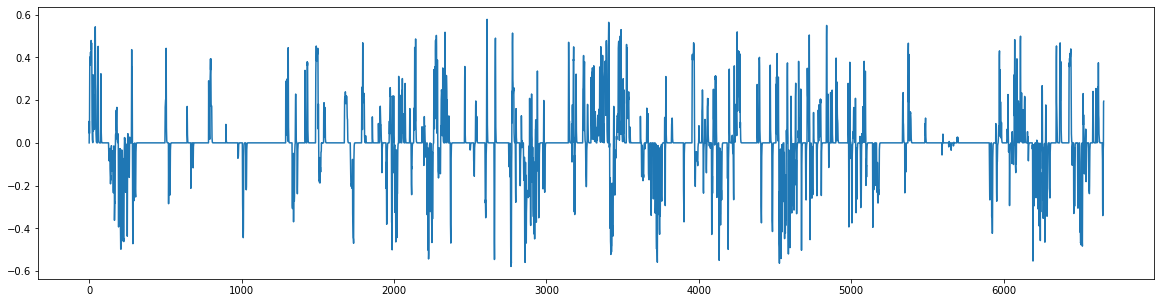

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
plt.plot(velocidade_jogadores_resultante['player_l1_v'])

In [59]:
# Nomes das colunas que são componentes de velocidades dos jogadores

jogadores_vx = []
jogadores_vy = []

for numero in range(1,12):
    vx = f'player_l{numero}_vx'
    vy = f'player_l{numero}_vy'
    jogadores_vx.append(vx)
    jogadores_vy.append(vy)

print(jogadores_vx, jogadores_vy)

['player_l1_vx', 'player_l2_vx', 'player_l3_vx', 'player_l4_vx', 'player_l5_vx', 'player_l6_vx', 'player_l7_vx', 'player_l8_vx', 'player_l9_vx', 'player_l10_vx', 'player_l11_vx'] ['player_l1_vy', 'player_l2_vy', 'player_l3_vy', 'player_l4_vy', 'player_l5_vy', 'player_l6_vy', 'player_l7_vy', 'player_l8_vy', 'player_l9_vy', 'player_l10_vy', 'player_l11_vy']


In [68]:
# Maior valor horizontal
cgame[jogadores_vx].max().max()

0.4803

In [69]:
# Maior valor vertical
cgame[jogadores_vy].max().max()

0.4906

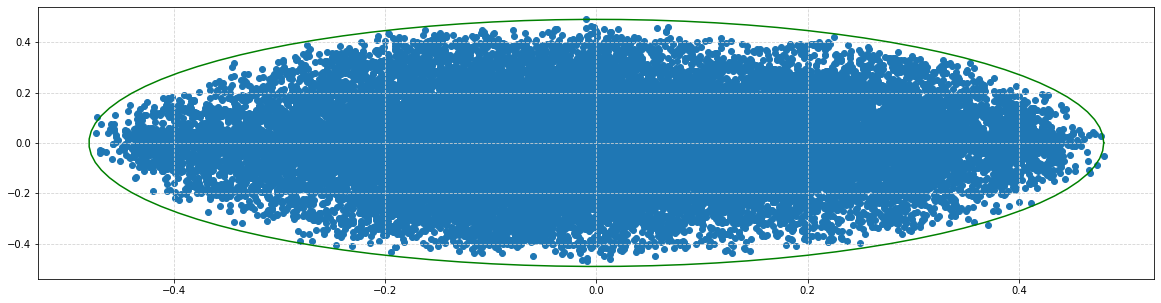

In [77]:
from math import pi

u = 0                                  # centro da elipse no x
v = 0                                  # centro da elipse no y
a = cgame[jogadores_vx].max().max()    # raio da elipse no x
b = cgame[jogadores_vy].max().max()    # raio da elipse no y

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)

t = np.linspace(0, 2*pi, 100)

plt.scatter(cgame[jogadores_vx], cgame[jogadores_vy])
plt.plot( u+a*np.cos(t) , v+b*np.sin(t), color='green')
plt.grid(color='lightgray',linestyle='--')
plt.show()

# Teste de hipótese

Hipótese Nula: Os atacantes tentam chutar mais vezes que os meio campistas
Hipótese Alternativa: Os atacantes não tentam chutar mais vezes que os meio campistas


In [157]:
player_kicks = []
colunas = []
action = 'kick'
side = 'l'

for numero in range(1, 12):
    colunas.append(f'player_{side}{numero}_{action}')
    
for player_number in range(1, 12):
    player_kicks.append(cgame[f'player_{side}{player_number}_counting_{action}'].max())

data = pd.DataFrame(player_kicks).transpose()
data.set_axis(colunas, axis=1, inplace=True)
data

,player_l1_kick,player_l2_kick,player_l3_kick,player_l4_kick,player_l5_kick,player_l6_kick,player_l7_kick,player_l8_kick,player_l9_kick,player_l10_kick,player_l11_kick
0,1,10,4,11,18,53,31,73,61,72,84


<AxesSubplot:>

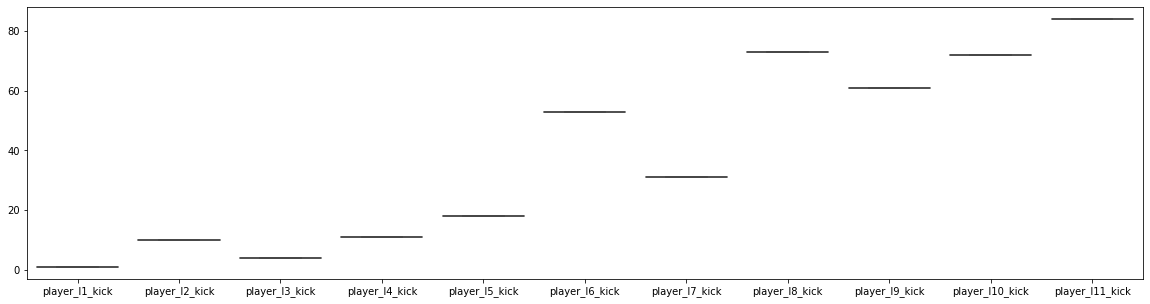

In [159]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.boxplot(data=data)